In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Activation
from pandas import read_excel, DataFrame, Series
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.models import Sequential
from numpy.random import seed
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [70]:
#Загрузка нормализованного датасета
dataset_norm=pd.read_excel('General_clear.xlsx')
dataset_norm.drop(['Unnamed: 0'],axis=1,inplace=True)
dataset_norm.head(10)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.000000,3000.000000,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.000000,3000.000000,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,70.0
5,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.000000,1800.000000,120.0,0,7.0,47.0
6,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.000000,1800.000000,120.0,0,7.0,57.0
7,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.000000,2000.000000,300.0,0,7.0,60.0
8,2.919678,2160.0,933.000000,129.00,21.250000,300.000000,1010.0,78.000000,2000.000000,300.0,0,7.0,70.0
9,1.598174,1950.0,827.000000,129.00,21.250000,300.000000,470.0,73.333333,2455.555556,220.0,0,9.0,57.0


In [71]:
# Разбиение выборки на обучающую и тестовую
x_train, x_test, y_train, y_test= train_test_split(dataset_norm.loc[:, dataset_norm.columns != 'Соотношение матрица-наполнитель'],
                                                    dataset_norm['Соотношение матрица-наполнитель'], 
                                                    test_size = 0.3, 
                                                    random_state = 14)

In [91]:
x_train

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
336,1844.280835,967.327724,67.167621,16.048978,286.308108,385.443290,71.130371,1957.342131,253.519428,0,5.154471,77.355590
919,1890.413468,417.316232,129.183416,27.474763,300.952708,758.747882,74.309704,2856.328932,194.754342,90,6.078902,77.434468
864,1909.648992,747.004366,163.931176,21.221074,321.999996,1116.165781,70.194666,3129.063740,216.784939,90,6.739064,48.718417
303,1984.314513,316.979375,56.636567,26.372176,274.873467,312.585304,71.702668,2122.101655,195.297699,0,2.896973,65.099618
293,1983.145504,950.679512,61.074494,22.922922,278.850418,955.745380,69.748799,2851.631846,290.577050,0,6.484849,39.334262
...,...,...,...,...,...,...,...,...,...,...,...,...
327,1937.582253,512.596699,111.068471,22.574466,343.767622,974.644540,69.471517,2180.474029,163.704762,0,6.511329,54.068752
406,1832.488438,670.710680,128.294056,25.856843,285.588941,680.482661,76.446944,2751.587084,220.701964,0,2.068707,39.098984
268,1943.344566,1162.575953,88.730103,25.275852,338.595451,388.991416,76.439166,3056.993289,105.204624,0,2.981106,49.516439
344,2019.574351,566.801799,108.053040,24.317107,327.219188,443.686026,80.114266,3320.951281,219.198882,0,7.303776,52.922258


In [92]:
y_train

336    2.958672
919    3.808020
864    3.499306
303    2.334624
293    2.828984
         ...   
327    3.048681
406    3.839343
268    3.223754
344    3.666993
619    2.643124
Name: Соотношение матрица-наполнитель, Length: 644, dtype: float64

In [93]:
x_test.shape

(276, 12)

In [94]:
y_test.shape

(276,)

In [99]:
# построение нейронной сети
model = Sequential() # тип нейронной сети
# количество слоёв и нейронов в каждом слое, функции активации
model.add(Dense(units=128, input_dim=12, activation='relu'))#указана размерность данных для первого слоя
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='softmax'))
#компиляция нейронной сети
model.compile(optimizer='Adam',loss='mean_squared_error',metrics=['accuracy'])
#обучение нейронной сети
trayning_NN=model.fit(x_train,y_train,batch_size=128, epochs=50, verbose=1)


Epoch 1/50
6/6 [==============================] - 1s 6ms/step - loss: 4.6170 - accuracy: 0.0000e+00
Epoch 2/50
6/6 [==============================] - 0s 5ms/step - loss: 4.6170 - accuracy: 0.0000e+00
Epoch 3/50
6/6 [==============================] - 0s 5ms/step - loss: 4.6170 - accuracy: 0.0000e+00
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 4.6170 - accuracy: 0.0000e+00
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 4.6170 - accuracy: 0.0000e+00
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 4.6170 - accuracy: 0.0000e+00
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 4.6170 - accuracy: 0.0000e+00
Epoch 8/50
6/6 [==============================] - 0s 5ms/step - loss: 4.6170 - accuracy: 0.0000e+00
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 4.6170 - accuracy: 0.0000e+00
Epoch 10/50
6/6 [==============================] - 0s 6ms/step - loss: 4.6170 - accuracy: 0.0000e+00

In [100]:
# статистика обучения для построения графика
trayning_NN.history

{'loss': [4.616992950439453,
  4.616992950439453,
  4.616993427276611,
  4.616992950439453,
  4.616992950439453,
  4.616993427276611,
  4.616993427276611,
  4.616992950439453,
  4.616992950439453,
  4.616992950439453,
  4.616992950439453,
  4.616992950439453,
  4.616992950439453,
  4.616993427276611,
  4.6169939041137695,
  4.616993427276611,
  4.616992950439453,
  4.616992950439453,
  4.616993427276611,
  4.616992473602295,
  4.616993427276611,
  4.616993427276611,
  4.616993427276611,
  4.616993427276611,
  4.616992950439453,
  4.616992950439453,
  4.616993427276611,
  4.616992950439453,
  4.616993427276611,
  4.616992950439453,
  4.616992950439453,
  4.616993427276611,
  4.616992950439453,
  4.616992950439453,
  4.616993427276611,
  4.616992950439453,
  4.616992950439453,
  4.616993427276611,
  4.616993427276611,
  4.616992950439453,
  4.616992950439453,
  4.616993427276611,
  4.616992473602295,
  4.616993427276611,
  4.616992950439453,
  4.616992950439453,
  4.616992950439453,
  4.

In [101]:
#архитектура нейронной сети
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 128)               1664      
                                                                 
 dense_56 (Dense)            (None, 256)               33024     
                                                                 
 dense_57 (Dense)            (None, 256)               65792     
                                                                 
 dense_58 (Dense)            (None, 64)                16448     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_59 (Dense)            (None, 1)                 65        
                                                                 
Total params: 116,993
Trainable params: 116,993
Non-t

In [102]:
#тестирование нейронной сети
test_NN=model.evaluate(x_test, y_test, batch_size=128)


3/3 [==============================] - 0s 4ms/step - loss: 4.3359 - accuracy: 0.0000e+00


In [103]:
#тестирование нейронной сети с помощью предиктора
test_NN_prediction=model.predict(x_test,batch_size=128)
test_NN_prediction.shape

3/3 [==============================] - 0s 4ms/step


(276, 1)

In [104]:
y_test.shape

(276,)

(0.0, 2.0)

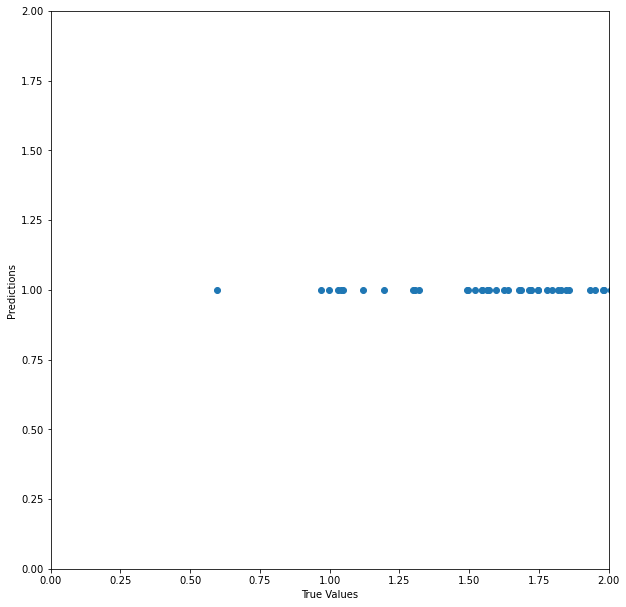

In [106]:
plt.figure(figsize = (10,12))
a = plt.axes(aspect = 'equal')
plt.scatter(y_test,test_NN_prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2]
plt.xlim(lims)
plt.ylim(lims)

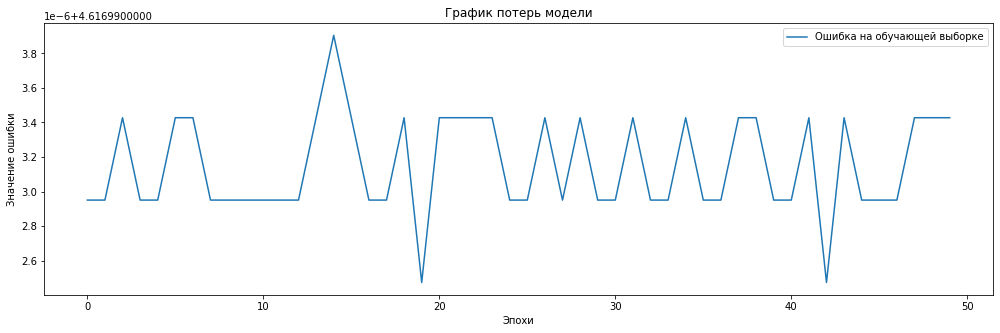

In [107]:
#График потерь на тренировочной и тестовой выборках
plt.figure(figsize = (17,5))
plt.plot(trayning_NN.history['loss'],
label = 'ошибка на обучающей выборке')
plt.title('График потерь модели')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи')
plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best')
plt.show()